In [1]:
import cv2
import os
import shutil
import itertools

In [2]:
from skimage.io import imread_collection
import glob
#your path 
yes_dir = glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/yes/*')
no_dir =glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/no/*')

In [3]:
len(yes_dir + no_dir)

253

In [4]:
import os
for i in range(0, len(yes_dir)):
    os.rename(yes_dir[i], 'C:/git/obrazyMRI/data/brain_tumor_dataset/yes\\yes_' + str(i+1) + '.jpg')
for i in range(0, len(no_dir)):
    os.rename(no_dir[i], 'C:/git/obrazyMRI/data/brain_tumor_dataset/no\\no_' + str(i+1) + '.jpg')

In [5]:
yes_dir = glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/yes/*')
no_dir =glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/no/*')

In [6]:
import os

# define the name of the directory to be created
path = ["C:/git/obrazyMRI/data/TEST/YES","C:/git/obrazyMRI/data/TEST/NO", "C:/git/obrazyMRI/data/TRAIN/YES",
       "C:/git/obrazyMRI/data/TRAIN/NO", "C:/git/obrazyMRI/data/VAL/YES", "C:/git/obrazyMRI/data/VAL/NO"]
for i in path:
    try:
        os.makedirs(i)
    except OSError:
        print ("Creation of the directory %s failed" % i)
    else:
        print ("Successfully created the directory %s" % i)

Successfully created the directory C:/git/obrazyMRI/data/TEST/YES
Successfully created the directory C:/git/obrazyMRI/data/TEST/NO
Successfully created the directory C:/git/obrazyMRI/data/TRAIN/YES
Successfully created the directory C:/git/obrazyMRI/data/TRAIN/NO
Successfully created the directory C:/git/obrazyMRI/data/VAL/YES
Successfully created the directory C:/git/obrazyMRI/data/VAL/NO


In [7]:
from math import *
import numpy as np
yes_test=np.random.choice(yes_dir, size=5, replace=False)
for i in yes_test:
    shutil.copy(i, "C:/git/obrazyMRI/data/TEST/YES" )
yes_dir=list(set(yes_dir)-set(yes_test))
yes_train=np.random.choice(yes_dir, size=floor(0.8*len(yes_dir)), replace=False)
for i in yes_train:
    shutil.copy(i, "C:/git/obrazyMRI/data/TRAIN/YES" )
yes_val=list(set(yes_dir)-set(yes_train))
for i in yes_val:
    shutil.copy(i, "C:/git/obrazyMRI/data/VAL/YES" )

In [8]:
from math import *
no_test=np.random.choice(no_dir, size=5, replace=False)
for i in no_test:
    shutil.copy(i, "C:/git/obrazyMRI/data/TEST/NO" )
no_dir=list(set(no_dir)-set(no_test))
no_train=np.random.choice(no_dir, size=floor(0.8*len(no_dir)), replace=False)
for i in no_train:
    shutil.copy(i, "C:/git/obrazyMRI/data/TRAIN/NO" )
no_val=list(set(no_dir)-set(no_train))
for i in no_val:
    shutil.copy(i, "C:/git/obrazyMRI/data/VAL/NO" )

In [9]:
import numpy as np
from random import shuffle
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

yes_train=list(yes_train)
no_train=list(no_train)
yes_val=list(yes_val)
no_val=list(no_val)
yes_test=list(yes_test)
no_test=list(no_test)

train_files = yes_train + no_train
val_files = yes_val + no_val
test_files = yes_test + no_test

shuffle(train_files)

IMG_DIM = (64, 64)
x_train = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in train_files])
x_val = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in val_files])
x_test = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in test_files])

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

x_train.astype('float64')
x_train /= 255.0
x_val.astype('float64')
x_val /= 255.0
x_test.astype('float64')
x_test /= 255.0

train_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in train_files]
val_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in val_files]
test_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in test_files]

le = LabelEncoder()
le.fit(train_labels)

y_train = le.transform(train_labels)
y_val = le.transform(val_labels)
y_test = le.transform(test_labels)


Using TensorFlow backend.


In [10]:
y_val

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [11]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

batch_size = 128
num_classes = 2
epochs = 150
input_shape = (64, 64, 3)

model = Sequential(name='Basic cnn model')

model.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=36,kernel_size=9, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

model.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        3904      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        20752     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 36)        46692     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 36)          0         
__________________________________________

In [12]:
history = model.fit(x=x_train, y=y_train,
                    validation_data=(x_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)




Train on 194 samples, validate on 49 samples
Epoch 1/150





194/194 [==============================] - 5s 28ms/step - loss: 2.1246 - acc: 0.4433 - val_loss: 0.7029 - val_acc: 0.3878
Epoch 2/150
194/194 [==============================] - 4s 20ms/step - loss: 0.7010 - acc: 0.4433 - val_loss: 0.6671 - val_acc: 0.6122
Epoch 3/150
194/194 [==============================] - 4s 21ms/step - loss: 0.6585 - acc: 0.6186 - val_loss: 0.6746 - val_acc: 0.7143
Epoch 4/150
194/194 [==============================] - 4s 22ms/step - loss: 0.6517 - acc: 0.7268 - val_loss: 0.6516 - val_acc: 0.6122
Epoch 5/150
194/194 [==============================] - 4s 21ms/step - loss: 0.6354 - acc: 0.6134 - val_loss: 0.7103 - val_acc: 0.6122
Epoch 6/150
194/194 [==============================] - 4s 22ms/step - loss: 0.6382 - acc: 0.6443 - val_loss: 0.6244 - val_acc: 0.6735
Epoch 7/150
194/194 [==============================] - 4s 21ms/step - loss: 0.5811 - acc: 0.6907 - val_loss: 0.6287 - val_acc: 0.6735
Epoch 8/1

Epoch 49/150
194/194 [==============================] - 2s 11ms/step - loss: 0.3533 - acc: 0.8299 - val_loss: 0.5235 - val_acc: 0.8163
Epoch 50/150
194/194 [==============================] - 4s 21ms/step - loss: 0.1640 - acc: 0.9691 - val_loss: 0.5277 - val_acc: 0.8163
Epoch 51/150
194/194 [==============================] - 4s 21ms/step - loss: 0.0713 - acc: 0.9897 - val_loss: 0.5741 - val_acc: 0.8163
Epoch 52/150
194/194 [==============================] - 4s 22ms/step - loss: 0.0508 - acc: 0.9948 - val_loss: 0.7510 - val_acc: 0.8367
Epoch 53/150
194/194 [==============================] - 4s 22ms/step - loss: 0.0739 - acc: 0.9742 - val_loss: 1.1501 - val_acc: 0.7347
Epoch 54/150
194/194 [==============================] - 4s 21ms/step - loss: 0.5395 - acc: 0.8093 - val_loss: 0.5436 - val_acc: 0.7755
Epoch 55/150
194/194 [==============================] - 4s 21ms/step - loss: 0.1954 - acc: 0.9433 - val_loss: 0.6254 - val_acc: 0.8367
Epoch 56/150
194/194 [==============================] -

194/194 [==============================] - 4s 22ms/step - loss: 4.5074e-04 - acc: 1.0000 - val_loss: 0.9676 - val_acc: 0.8367
Epoch 110/150
194/194 [==============================] - 4s 21ms/step - loss: 3.8790e-04 - acc: 1.0000 - val_loss: 0.9876 - val_acc: 0.8367
Epoch 111/150
194/194 [==============================] - 4s 22ms/step - loss: 3.3874e-04 - acc: 1.0000 - val_loss: 0.9964 - val_acc: 0.8367
Epoch 112/150
194/194 [==============================] - 4s 22ms/step - loss: 2.9367e-04 - acc: 1.0000 - val_loss: 1.0168 - val_acc: 0.8367
Epoch 113/150
194/194 [==============================] - 4s 23ms/step - loss: 2.5849e-04 - acc: 1.0000 - val_loss: 1.0370 - val_acc: 0.8367
Epoch 114/150
194/194 [==============================] - 4s 22ms/step - loss: 2.2360e-04 - acc: 1.0000 - val_loss: 1.0428 - val_acc: 0.8163
Epoch 115/150
194/194 [==============================] - 4s 22ms/step - loss: 1.9180e-04 - acc: 1.0000 - val_loss: 1.0715 - val_acc: 0.8163
Epoch 116/150
194/194 [===========

In [13]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.699999988079071


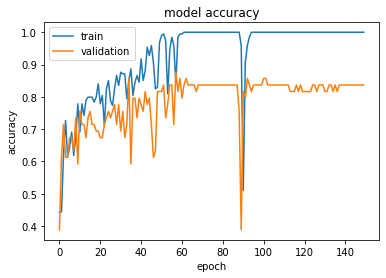

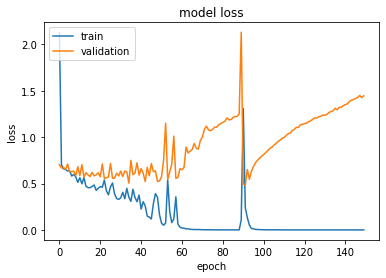

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()